# Fuzzy Framework for Speed Estimation
### North of New South Wales in eastern Australia

In this notebook, the Fuzzy-FSE is applied for the north of New South Wales. The specific membership functions for NNSW can be found in line 7.

In [1]:
%pylab inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl # for API example
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate variable velocity variables
velocity = []
names = ['mw','tr','pr-pv', 'pr-up', 'sc-pv', 'sc-up', 'ty-pv','ty-up', 'uc-pv','uc-up']
for i in range(10):
    name = 'velocity_' + names[i]
    velocity.append(ctrl.Consequent(np.arange(0, 121, 0.1), name, defuzzify_method='centroid'))

### Membership functions for Terrain

Depending on the input values, the membership function for terrain can either be approximated using road slope or using the support points per kilometer.
Either membership function can be used.

/Users/johannaguth/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


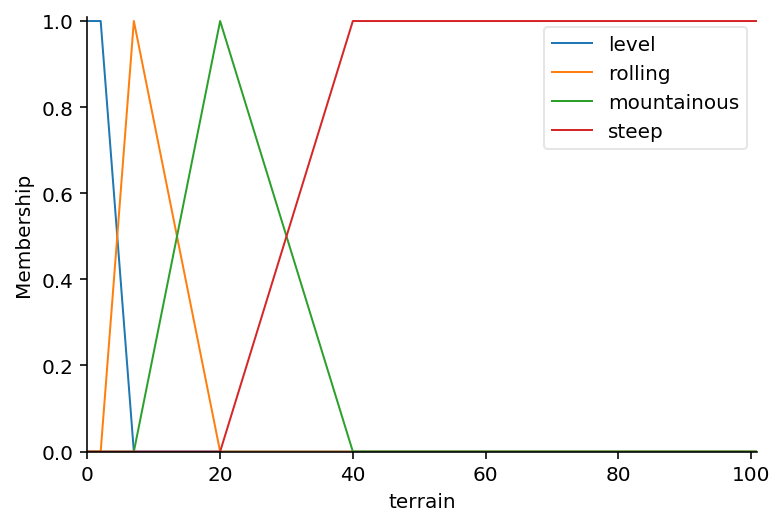

In [3]:
### With Slope Percentage as Slope

terrain = ctrl.Antecedent(np.arange(0, 101, 0.1), 'terrain')

terrain['level'] = fuzz.trapmf(terrain.universe, [-1, -1, 2, 7])
terrain['rolling'] = fuzz.trapmf(terrain.universe, [2, 7, 7, 20])
terrain['mountainous'] = fuzz.trapmf(terrain.universe, [7, 20, 20, 40])
terrain['steep'] = fuzz.trapmf(terrain.universe, [20, 40, 500, 500])
terrain.view()

terrain.defuzzify_method = 'centroid'

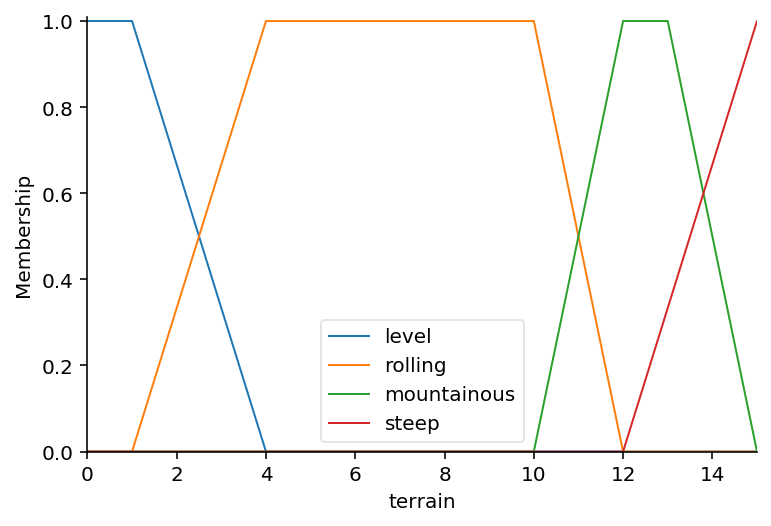

In [4]:
### With Support Points as Slope

terrain = ctrl.Antecedent(np.arange(0, 20, 0.05), 'terrain')

terrain['level'] = fuzz.trapmf(terrain.universe, [-1, -1, 1, 4])
terrain['rolling'] = fuzz.trapmf(terrain.universe, [1, 4, 10, 12])
terrain['mountainous'] = fuzz.trapmf(terrain.universe, [10, 12, 13, 15])
terrain['steep'] = fuzz.trapmf(terrain.universe, [12, 15, 20, 20])
terrain.view()
axes = plt.gca()
axes.set_xlim([0,15])

terrain.defuzzify_method = 'centroid'

### Membership function for link length

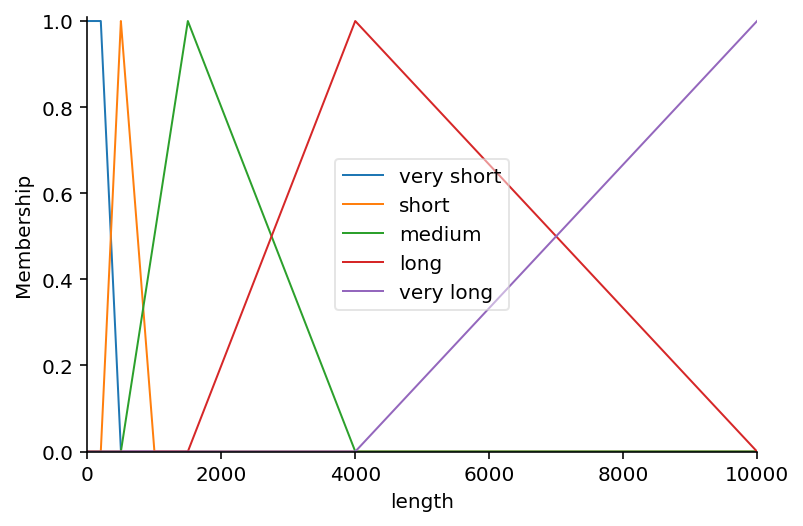

In [6]:
length = ctrl.Antecedent(np.arange(0, 40000, 1), 'length')

length['very short'] = fuzz.trapmf(length.universe, [-1, -1, 200, 500])
length['short'] = fuzz.trapmf(length.universe, [200, 500, 500, 1000])
length['medium'] = fuzz.trapmf(length.universe, [500, 1500, 1500, 4000])
length['long'] = fuzz.trapmf(length.universe, [1500, 4000, 4000, 10000])
length['very long'] = fuzz.trapmf(length.universe, [4000, 10000, 100000, 100000])
length.view()
axes = plt.gca()
axes.set_xlim([0,10000])

length.defuzzify_method = 'centroid'

### Defining the membership functions for the different road classes 
These membership functions are specific for Bio-Bio and Maule regions.

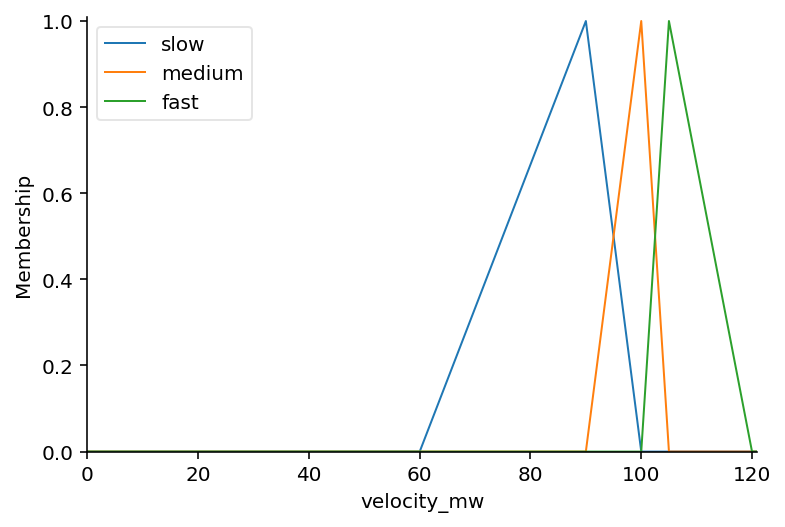

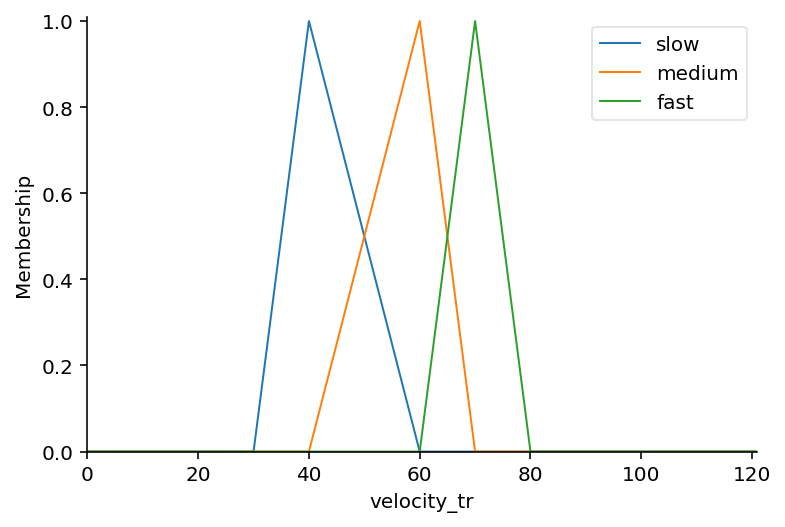

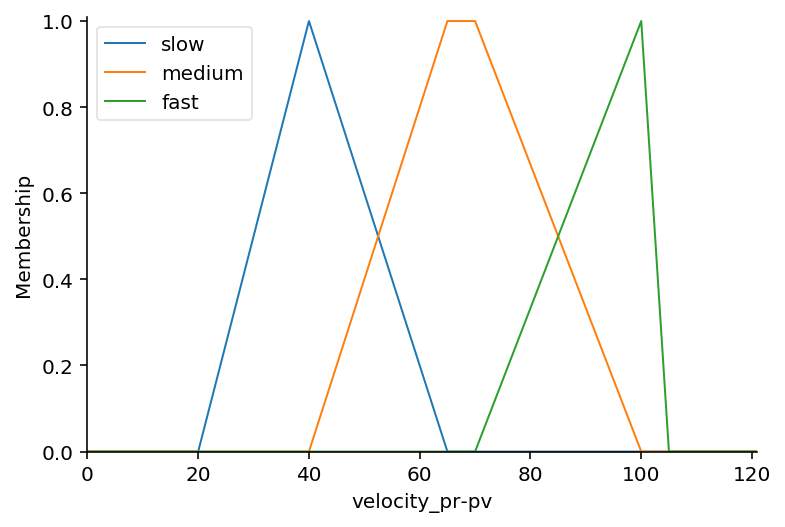

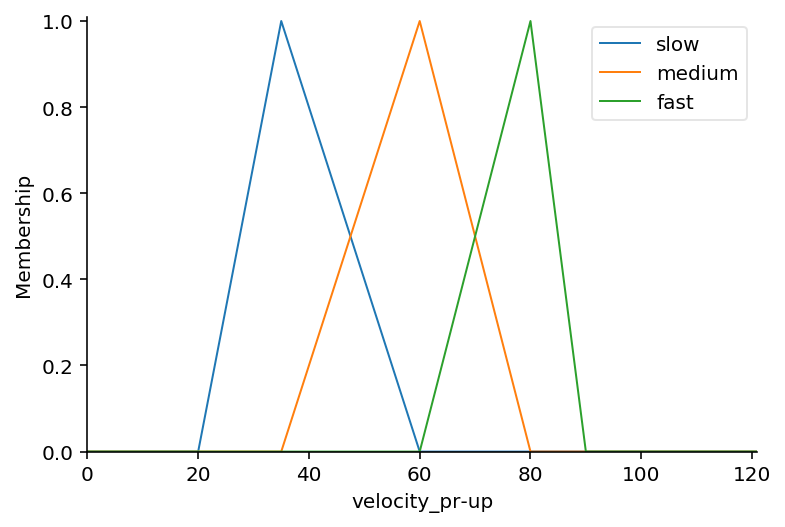

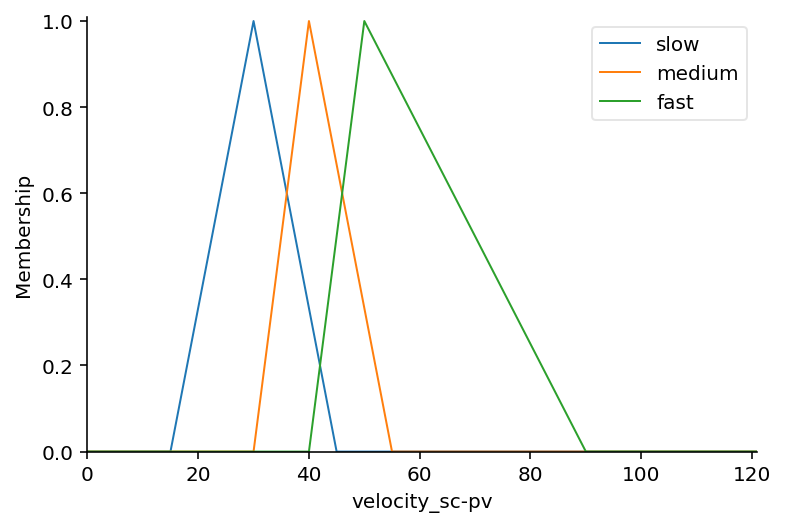

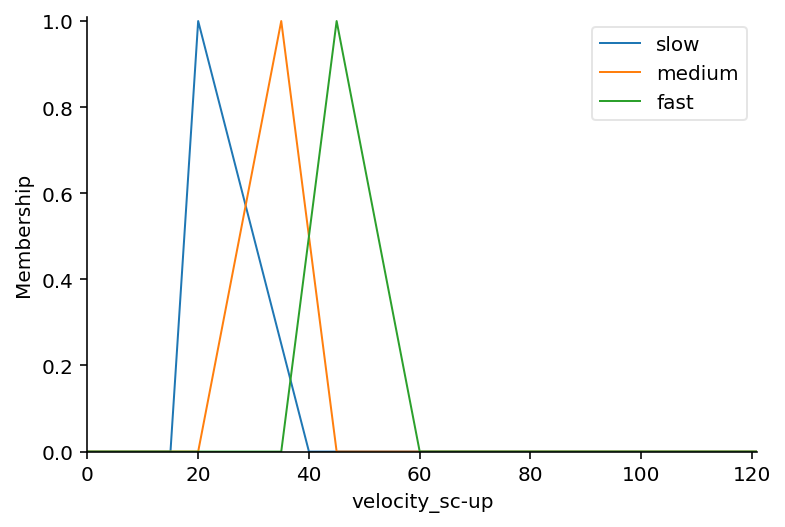

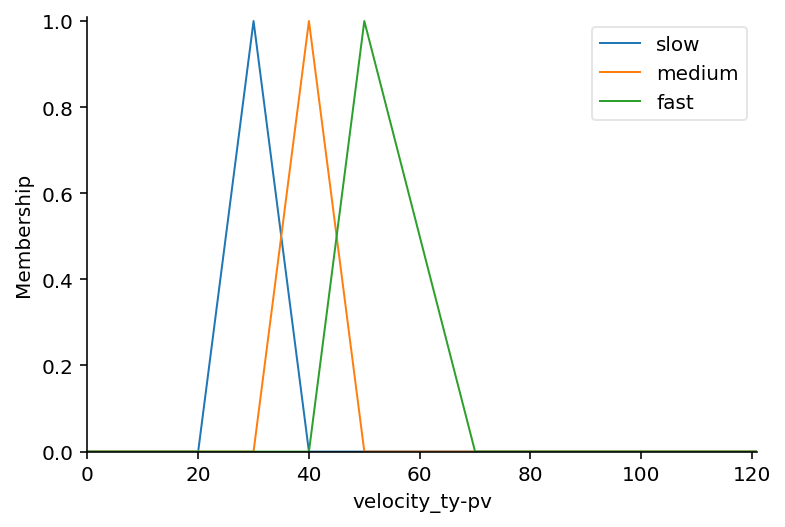

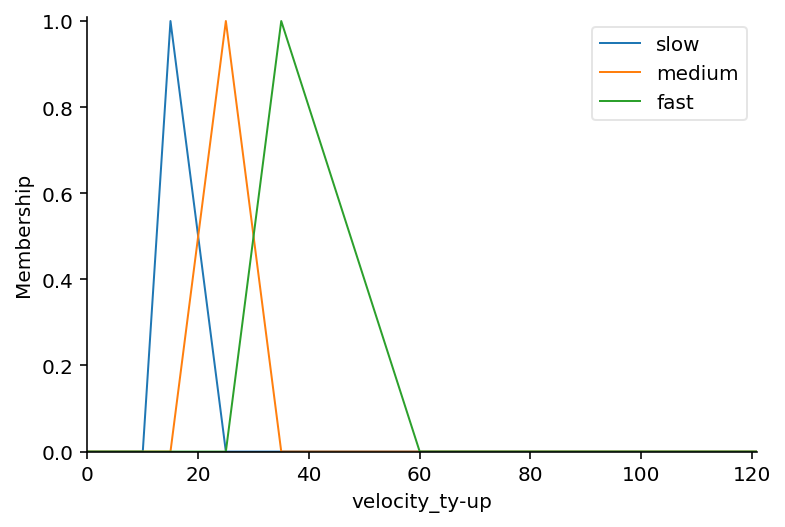

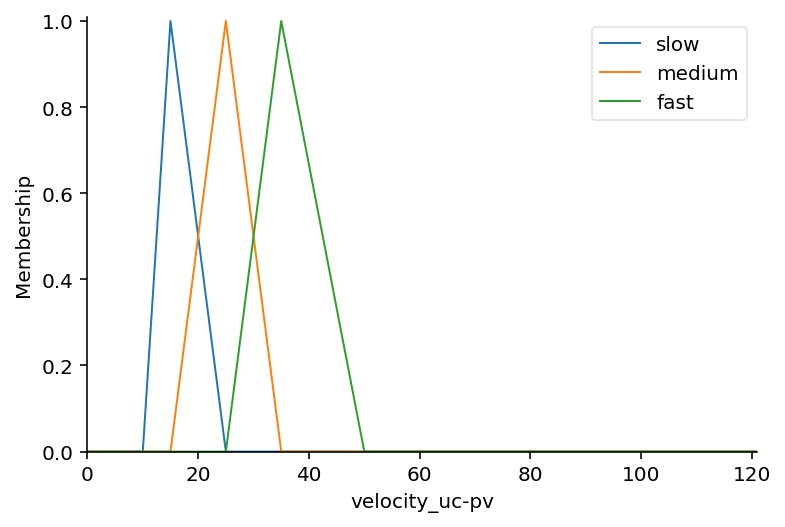

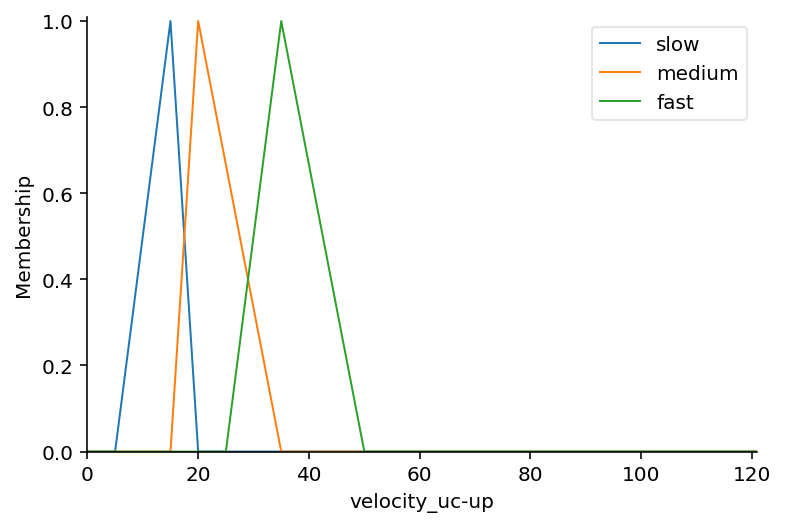

In [7]:
### Membership Funktions for velocity -- different classes
## Motorway
velocity[0]['slow'] = fuzz.trapmf(velocity[0].universe, [60, 90, 90, 100])
velocity[0]['medium'] = fuzz.trapmf(velocity[0].universe, [90, 100, 100, 105])
velocity[0]['fast'] = fuzz.trapmf(velocity[0].universe, [100, 105, 105, 120])

## Trunk
velocity[1]['slow'] = fuzz.trapmf(velocity[1].universe, [30, 40, 40, 60])
velocity[1]['medium'] = fuzz.trapmf(velocity[1].universe, [40, 60, 60, 70])
velocity[1]['fast'] = fuzz.trapmf(velocity[1].universe, [60, 70, 70, 80])

## Primary paved
velocity[2]['slow'] = fuzz.trapmf(velocity[2].universe, [20, 40, 40, 65])
velocity[2]['medium'] = fuzz.trapmf(velocity[2].universe, [40, 65, 70, 100])
velocity[2]['fast'] = fuzz.trapmf(velocity[2].universe, [70, 100, 100, 105])

## Primary unpaved
velocity[3]['slow'] = fuzz.trapmf(velocity[3].universe, [20, 35, 35, 60])
velocity[3]['medium'] = fuzz.trapmf(velocity[3].universe, [35, 60, 60, 80])
velocity[3]['fast'] = fuzz.trapmf(velocity[3].universe, [60, 80, 80, 90])

## Secondary paved
velocity[4]['slow'] = fuzz.trapmf(velocity[4].universe, [15, 30, 30, 45])
velocity[4]['medium'] = fuzz.trapmf(velocity[4].universe, [30, 40, 40, 55])
velocity[4]['fast'] = fuzz.trapmf(velocity[4].universe, [40, 50, 50, 90])

## Secondary unpaved
velocity[5]['slow'] = fuzz.trapmf(velocity[5].universe, [15, 20, 20, 40])
velocity[5]['medium'] = fuzz.trapmf(velocity[5].universe, [20, 35, 35, 45])
velocity[5]['fast'] = fuzz.trapmf(velocity[5].universe, [35, 45, 45, 60])

## Tertiary paved
velocity[6]['slow'] = fuzz.trapmf(velocity[6].universe, [20, 30, 30, 40])
velocity[6]['medium'] = fuzz.trapmf(velocity[6].universe, [30, 40, 40, 50])
velocity[6]['fast'] = fuzz.trapmf(velocity[6].universe, [40, 50, 50, 70])

## Tertiary unpaved
velocity[7]['slow'] = fuzz.trapmf(velocity[7].universe, [10, 15, 15, 25])
velocity[7]['medium'] = fuzz.trapmf(velocity[7].universe, [15, 25, 25, 35])
velocity[7]['fast'] = fuzz.trapmf(velocity[7].universe, [25, 35, 35, 60])

## Unclassified paved
velocity[8]['slow'] = fuzz.trapmf(velocity[8].universe, [10, 15, 15, 25])
velocity[8]['medium'] = fuzz.trapmf(velocity[8].universe, [15, 25, 25, 35])
velocity[8]['fast'] = fuzz.trapmf(velocity[8].universe, [25, 35, 35, 50])

## Unclassified unpaved
velocity[9]['slow'] = fuzz.trapmf(velocity[9].universe, [5, 15, 15, 20])
velocity[9]['medium'] = fuzz.trapmf(velocity[9].universe, [15, 20, 20, 35])
velocity[9]['fast'] = fuzz.trapmf(velocity[9].universe, [25, 35, 35, 50])


#plt.subplot(6, 1, 1)
velocity[0].view()
velocity[1].view()
velocity[2].view()
velocity[3].view()
velocity[4].view()
velocity[5].view()
velocity[6].view()
velocity[7].view()
velocity[8].view()
velocity[9].view()

### Definition of the rule base for the Fuzzy Control System

In [8]:
## Fuzzy Ruleset
ruleset = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    # very long
    ruleset[i].append(ctrl.Rule(terrain['level'] & length['very long'], velocity[i]['fast']))
    ruleset[i].append(ctrl.Rule(terrain['rolling'] & length['very long'], consequent = (velocity[i]['fast'], velocity[i]['medium'])))
    ruleset[i].append(ctrl.Rule(terrain['mountainous'] & length['very long'], velocity[i]['medium']))
    ruleset[i].append(ctrl.Rule(terrain['steep'] & length['very long'], consequent = (velocity[i]['medium'], velocity[i]['slow'])))
    
    # long
    ruleset[i].append(ctrl.Rule(terrain['level'] & length['long'], consequent = (velocity[i]['fast']%0.6, velocity[i]['medium']%0.4)))
    ruleset[i].append(ctrl.Rule(terrain['rolling'] & length['long'], consequent = (velocity[i]['fast']%0.2, velocity[i]['medium']%0.8)))
    ruleset[i].append(ctrl.Rule(terrain['mountainous'] & length['long'], consequent = (velocity[i]['medium']%0.9, velocity[i]['slow']%0.1)))
    ruleset[i].append(ctrl.Rule(terrain['steep'] & length['long'], consequent = (velocity[i]['medium']%0.4, velocity[i]['slow']%0.6)))

    # medium
    ruleset[i].append(ctrl.Rule(terrain['level'] & length['medium'], consequent = (velocity[i]['fast']%0.4, velocity[i]['medium']%0.6)))
    ruleset[i].append(ctrl.Rule(terrain['rolling'] & length['medium'], consequent = (velocity[i]['fast']%0.1, velocity[i]['medium']%0.9)))
    ruleset[i].append(ctrl.Rule(terrain['mountainous'] & length['medium'], consequent = (velocity[i]['medium']%0.6, velocity[i]['slow']%0.4)))
    ruleset[i].append(ctrl.Rule(terrain['steep'] & length['medium'], consequent = (velocity[i]['medium']%0.1, velocity[i]['slow']%0.9)))
    
    # short
    ruleset[i].append(ctrl.Rule(terrain['level'] & length['short'], consequent = (velocity[i]['fast']%0.2, velocity[i]['medium']%0.8)))
    ruleset[i].append(ctrl.Rule(terrain['rolling'] & length['short'], consequent = (velocity[i]['medium']%0.7, velocity[i]['slow']%0.3)))
    ruleset[i].append(ctrl.Rule(terrain['mountainous'] & length['short'], consequent = (velocity[i]['medium']%0.3, velocity[i]['slow']%0.8)))
    ruleset[i].append(ctrl.Rule(terrain['steep'] & length['short'], velocity[i]['slow']))

    # very short
    ruleset[i].append(ctrl.Rule(terrain['level'] & length['very short'], velocity[i]['medium']))
    ruleset[i].append(ctrl.Rule(terrain['rolling'] & length['very short'], consequent = (velocity[i]['medium'], velocity[i]['slow'])))
    ruleset[i].append(ctrl.Rule(terrain['mountainous'] & length['very short'], velocity[i]['slow']))
    ruleset[i].append(ctrl.Rule(terrain['steep'] & length['very short'], velocity[i]['slow']))

In [9]:
velocity_calc = []
for i in range(10):
    velocity_calc.append(ctrl.ControlSystemSimulation(ctrl.ControlSystem(ruleset[i])))

### Database connection

The roads are administrated in a pgsql database. The Fuzzy-FSE is applied to estimate speed values, then the values are inserted in the database.

In [6]:
## Database parameters
host = 'xxx'
port = 'xxx'
database = 'xxx'
user = 'xxx'
pw = 'xxx'
region = '_bm'
ways_table = 'ways' + region

In [7]:
## Fetching the ways table
conn = psycopg2.connect("host='" + host + "' port='" + port + "' dbname='" + database + "' user='" + user + "' password='" + pw + "'")
cur = conn.cursor()
cur.execute('SELECT ' + ways_table + '.gid, ' + ## = Unique identifier of the object
            ' ' + ways_table + '.class_id, ' + ## = Road class id
            ' ' + ways_table + '.surf_val, ' + ## = Surface Value
            ' ' + ways_table + '.length_m, ' + ## = Length of the link
            ' ' + ways_table + '.nnsw_slope ' + ## = Road slope
            ' FROM ' + ways_table) 
ways = cur.fetchall()
cur.close()
conn.close()



OperationalError: invalid port number: "xxx"


In [8]:
## Defining the class ids and surface values
id_motorway = 101
id_motorwaylink = 102
id_trunk = 103
id_trunklink = 104
id_primary = 105
id_primarylink = 106
id_secondary = 107
id_secondarylink = 108
id_tertiary = 109
id_tertiarylink = 110
id_unclassified = 111

paved = "paved"
unpaved = "unpaved"
nosurf = "NULL"

In [12]:
## Rulebased fetching of the FCS
tic = time.time()
results = []

for item in ways:
    # Motorways
    if item[1] == id_motorway or item[1] == id_motorwaylink:
        velocity_calc[0].input['terrain'] = item[4]
        velocity_calc[0].input['length'] = item[3]
        velocity_calc[0].compute()
        results.append(item + (velocity_calc[0].output['velocity_mw'],))
    # Trunk
    elif item[1] == id_trunk or item[1] == id_trunklink:
        velocity_calc[1].input['terrain'] = item[4]
        velocity_calc[1].input['length'] = item[3]
        velocity_calc[1].compute()
        results.append(item + (velocity_calc[1].output['velocity_tr'],))
    # Primary paved
    elif (item[1] == id_primary or item[1] == id_primarylink) and (item[2] == paved or item[2]== nosurf): # Default: if no surface value: assumed paved
        velocity_calc[2].input['terrain'] = item[4]
        velocity_calc[2].input['length'] = item[3]
        velocity_calc[2].compute()
        results.append(item + (velocity_calc[2].output['velocity_pr-pv'],))
    # Primary unpaved
    elif (item[1] == id_primary or item[1] == id_primarylink) and item[2] == unpaved: # Default: if no surface value: assumed paved
        velocity_calc[3].input['terrain'] = item[4]
        velocity_calc[3].input['length'] = item[3]
        velocity_calc[3].compute()
        results.append(item + (velocity_calc[3].output['velocity_pr-up'],))
    # Secondary paved
    elif (item[1] == id_secondary or item[1] == id_secondarylink) and (item[2] == paved or item[2]== nosurf): # Default: if no surface value: assumed paved
        velocity_calc[4].input['terrain'] = item[4]
        velocity_calc[4].input['length'] = item[3]
        velocity_calc[4].compute()
        results.append(item + (velocity_calc[4].output['velocity_sc-pv'],))
    # Secondary unpaved
    elif (item[1] == id_secondary or item[1] == id_secondarylink) and item[2] == unpaved: # Default: if no surface value: assumed paved
        velocity_calc[5].input['terrain'] = item[4]
        velocity_calc[5].input['length'] = item[3]
        velocity_calc[5].compute()
        results.append(item + (velocity_calc[5].output['velocity_sc-up'],))
    # Tertiary paved
    elif (item[1] == id_tertiary or item[1] == id_tertiarylink) and (item[2] == paved): # Default: if no surface value: assumed unpaved
        velocity_calc[6].input['terrain'] = item[4]
        velocity_calc[6].input['length'] = item[3]
        velocity_calc[6].compute()
        results.append(item + (velocity_calc[6].output['velocity_ty-pv'],))
    # Tertiary unpaved
    elif (item[1] == id_tertiary or item[1] == id_tertiarylink) and (item[2] == unpaved or item[2] == nosurf): # Default: if no surface value: assumed unpaved
        velocity_calc[7].input['terrain'] = item[4]
        velocity_calc[7].input['length'] = item[3]
        velocity_calc[7].compute()
        results.append(item + (velocity_calc[7].output['velocity_ty-up'],))
    # Unclassified paved
    elif (item[1] == id_unclassified) and (item[2] == paved): # Default: if no surface value: assumed unpaved
        velocity_calc[8].input['terrain'] = item[4]
        velocity_calc[8].input['length'] = item[3]
        velocity_calc[8].compute()
        results.append(item + (velocity_calc[8].output['velocity_uc-pv'],))
    # Unclassified unpaved
    elif (item[1] == id_unclassified) and (item[2] == unpaved or item[2] == nosurf): # Default: if no surface value: assumed unpaved
        velocity_calc[9].input['terrain'] = item[4]
        velocity_calc[9].input['length'] = item[3]
        velocity_calc[9].compute()
        results.append(item + (velocity_calc[9].output['velocity_uc-up'],))

toc = time.time() 
print('Fetching the FCS took ' + str(toc-tic) + ' seconds ('+ str((toc-tic)/60) + ' minutes)')

Fetching the FCS took 164.21978116035461 seconds (2.736996352672577 minutes)


## A plot can be generated for one specific MF speed

Here we plot the distribution of the MF speed for the class "Tertiary" and the surface "unpaved".

In [18]:
# Builds custom array
slopes = np.linspace(40,0,41)
levels = np.linspace(5000,0,501)
a, b = np.meshgrid(slopes, levels)
c = np.zeros_like(a)

# Loop through the system scale*scale times to collect the control surface
tic = time.time()
for i in range(41):
    for j in range(501):
        velocity_calc[7].input['terrain'] = a[j, i]
        velocity_calc[7].input['length'] = b[j,i]
        velocity_calc[7].compute()
        c[j,i] = velocity_calc[7].output['velocity_ty-up']
toc = time.time() 
print(str(601 * 21) + ' loops through control surface took ' + str(toc-tic) + ' seconds ('+ str((toc-tic)/60) + ' minutes)')

12621 loops through control surface took 57.225144147872925 seconds (0.9537524024645487 minutes)


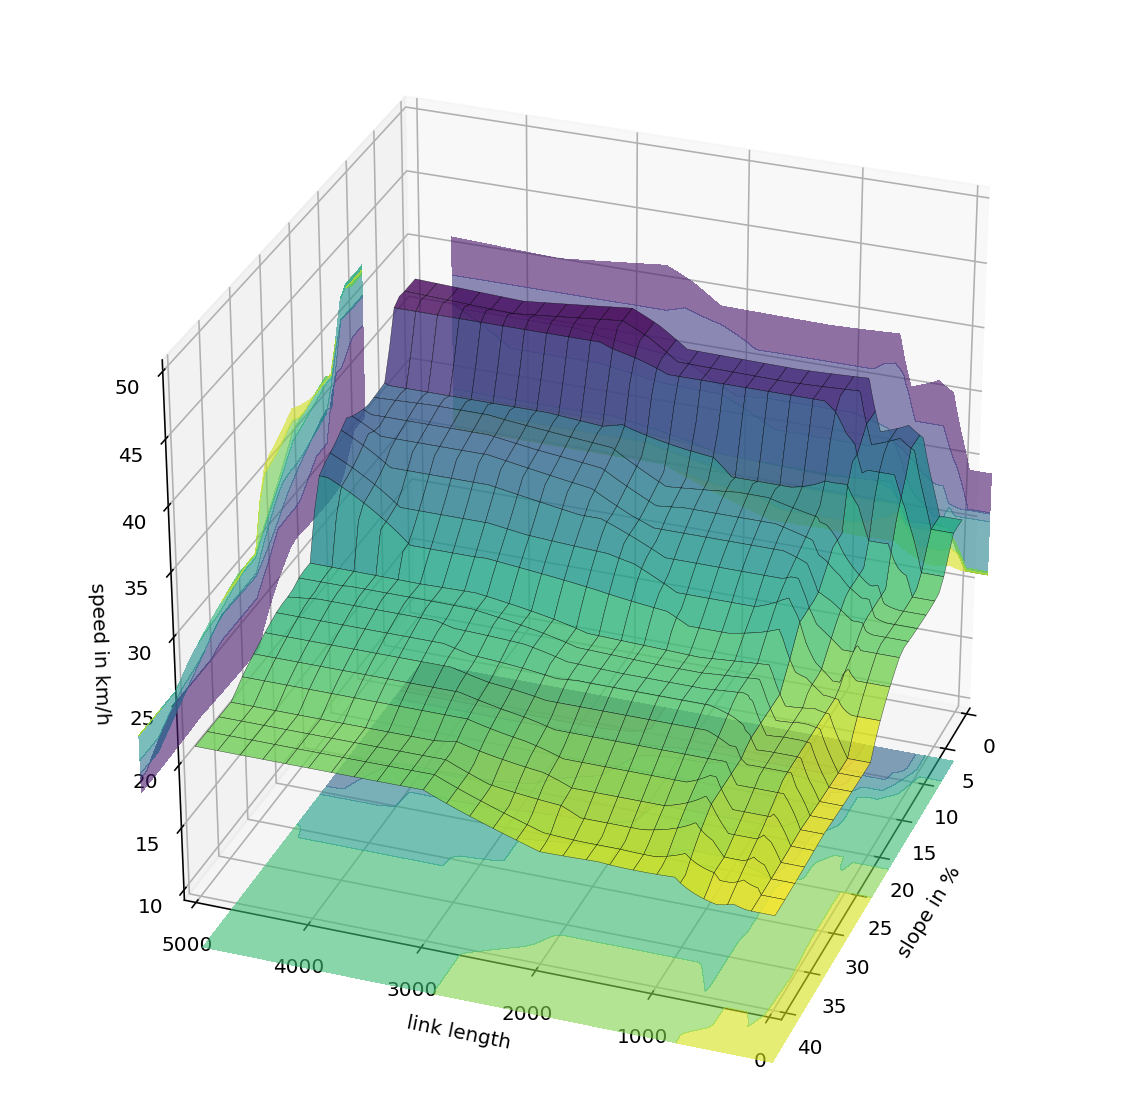

In [21]:
# Plot the result in pretty 3D with alpha blending
color_r = 'viridis_r'
color = 'viridis'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(a, b, c, rstride=20, cstride=2, cmap=color_r,
                       linewidth=0.2, antialiased=True, alpha= 0.8, edgecolor='black')

cset = ax.contourf(a, b, c, zdir='z', offset=5, cmap=color_r, alpha=0.6)
cset = ax.contourf(a, b, c, zdir='x', offset=-7, cmap=color, alpha=0.6)
cset = ax.contourf(a, b, c, zdir='y', offset=5500, cmap=color, alpha=0.6)

ax.set_ylim(0, 5000)
ax.set_ylabel('link length')
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_xlim(40, 0)
ax.set_xlabel('slope in %')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_zlim(10, 50)
ax.set_zlabel('speed in km/h')
#ax.zaxis.set_major_locator(ticker.MultipleLocator(10))

ax.view_init(30, 200)